## **TIL**
* **머신러닝과 딥러닝의 차이?**
    * 머신러닝: 정형데이터 분석
    * 딥러닝: 비정형 데이터 포함 분석

* 머신러닝을 사용하지 않는 이상 대부분은 분류 task
* **오차 계산에서의 차이점**
    * 고전적인 회귀 분석 머신러닝: $f(x)$ 계산식이 고정이어서 오차 계산 하지 않음
    * 딥러닝: $w, b$를 무작위로 만들어서 오차를 계산하고, 오차가 최소가 되도록 경사하강(미분, Gradient descent)하여 오차 계산하는 과정 반복
        
        > * 경사하강법: 딥러닝 알고리즘 학습 시 목표는 예측값과 정답값 간의 차이인 손실 함수의 크기를 최소화시키는 파라미터를 찾는 것

        <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fd0DKa4%2FbtrCKjA6dHH%2FKd6HN8fi77eYBUOkQQd0q1%2Fimg.png" style = "width: 30%;">

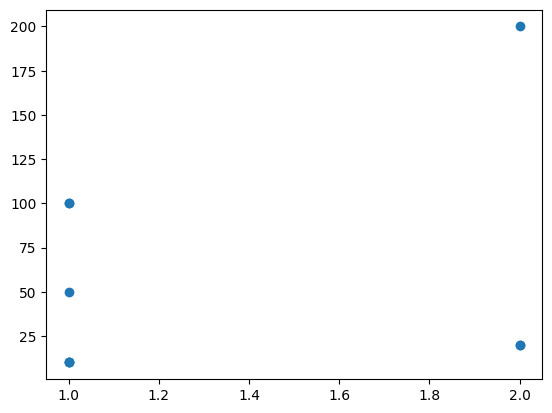

In [6]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,1,1,1,2,2,1,1])
y = np.array([100,200,100,50,10,20,20,10,10])

len(x), len(y), x.mean(), y.mean()

plt.scatter(x, y)


In [11]:
w = np.sum((x-x.mean()) * (y - y.mean())) / np.sum((x-x.mean())**2)
b = y.mean() - w * x.mean()
w, b

(33.33333333333333, 13.333333333333343)

In [12]:
model = LinearRegression()
model.fit(np.reshape(x, (-1, 1)), y)
model.coef_, model.intercept_

(array([33.33333333]), 13.333333333333343)

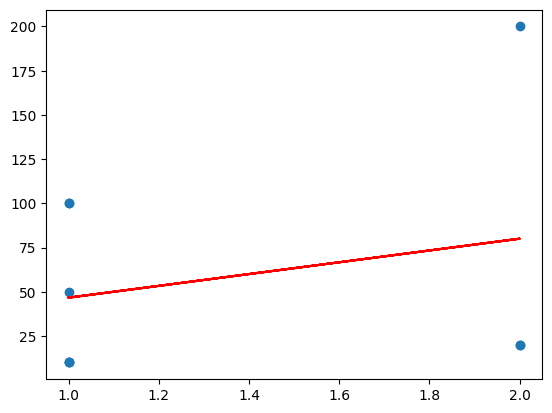

In [15]:
plt.scatter(x, y)
plt.plot(x, model.predict(np.reshape(x, (-1, 1))), 'r')

### **훈련 데이터와 테스트 데이터**

<img src = "https://velog.velcdn.com/images%2Frcchun%2Fpost%2Ffc232e11-de18-4b8f-8028-34378f8673f2%2Fimage.png" style = "width: 50%">

* **훈련 데이터(Training Data):**

    > * 훈련 데이터는 **모델을 학습하는 데 사용**됩니다.
    > * 모델이 예측하고자 하는 목표 변수(타겟 변수)와 그에 대한 입력 변수(특성)들이 포함됩니다.
    > * 일반적으로 훈련 데이터는 모델이 학습하는 데 충분한 다양성과 양을 가지고 있어야 합니다.
    > * 훈련 데이터는 모델이 일반화(generalization)하는 데 도움이 되는 다양한 패턴과 특징을 포착해야 합니다.

* **테스트 데이터(Test Data):**

    > * 테스트 데이터는 모델이 학습한 후에 모델의 **성능을 평가**하는 데 사용됩니다.
    > * 테스트 데이터는 훈련 데이터와 유사하게 구성되어 있지만 모델이 **이전에 본 적이 없는 새로운 데이터**로 구성됩니다.
    > * 테스트 데이터를 사용하여 모델의 예측을 평가하고 모델의 성능을 측정합니다.
    > * 모델 $w, b$의 오차가 작은지, 일치 확률이 높은지 확인

* **검증용 데이터(Validation Data):**
    > * 모델의 **성능을 조정**하기 위한 용도입니다.
    > * 과적합이 되고 있는지 판단하거나 하이퍼파라미터의 조정을 위한 용도입니다.
    > * 훈련용 데이터로 훈련을 모두 시킨 모델은 검증용 데이터를 사용하여 **정확도를 검증하며 하이퍼파라미터를 튜닝(tuning)** 합니다. 훈련데이터에서 경사하강(오차역전파)을 통해 오차를 줄일 때 $w, b$를 넣고 $y$값의 오차를 확인

* **비유하자면 훈련 데이터는 문제지, 검증 데이터는 모의고사, 테스트 데이터는 실력을 최종적으로 평가하는 수능 시험이라고 볼 수 있다.**
* 검증 데이터와 테스트 데이터를 나눌 만큼 데이터가 충분하지 않다면 k-폴드 교차 검증이라는 또 다른 방법을 사용

    > * k-fold 교차 검증은 데이터를 k개의 서브셋(또는 폴드)으로 나누고, 각각의 폴드를 한 번씩 테스트 세트로 사용하여 모델을 k번 평가합니다.
    > * k-1개의 폴드를 합쳐서 훈련 세트로 사용하고, 나머지 1개의 폴드를 테스트 세트로 사용합니다.
    > * 이 과정을 k번 반복하여 각 폴드가 한 번씩 테스트 세트로 사용되도록 합니다.
    > * 각 폴드의 성능을 평균하여 모델의 최종 성능을 계산합니다. 

* **훈련과 테스트 데이터를 나누는 적절한 비율**은 다음의 요소에 의해 결정됨
    * 데이터의 양, 모델의 복잡성, 데이터의 품질, 모델 평가의 목적, 교차 검증 사용 여부
    
    * 일반적으로 60%~80%의 데이터를 훈련에 사용
    * 실험을 통해 여러 비율을 시도하고 모델의 성능을 평가하여 최적의 비율을 정하는 것이 좋음
     * 참고: `stratify`
        > * `stratify`는 데이터를 나눌 때 클래스(또는 레이블) 간의 분포를 유지하는 방법을 의미합니다. 
        > * 특히, 기계 학습에서 주로 사용되며, 데이터를 나눌 때 각 클래스의 비율을 유지하여 훈련 및 테스트 세트를 만듭니다. 
        > * 특히, 분류 문제에서 클래스가 불균형하게 분포되어 있는 경우에는 모델이 불균형한 클래스에 대해 더 잘 학습하도록 하는 데 도움이 될 수 있습니다.

* **알아두기**
> * 훈련 데이터는 fit하지만 테스트 데이터는 fit하지 않음. 

> * Scaling(정규화)할 때 훈련 데이터로 맞추는 것이 아니라 테스트 데이터로 맞춤
* **공식 알아두기: Min-max Scaler**
    * $xscaled​ = \frac {x−min(x)} {max(x)−min(x)}​$ <br>
* 공부 자료: <a>https://wikidocs.net/84617</a> 


#### 실습: 타이타닉 승객 분류

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
import numpy as np

In [3]:
# %pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/binary_classification/%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_b0fdSDZ.xlsx?raw=true',engine = "openpyxl" , sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/binary_classification/%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_b0fdSDZ.xlsx?raw=true', engine = "openpyxl" ,sheet_name='test')

In [5]:
labels = ['사망', '생존']

##########데이터 분석

##########데이터 전처리

x_train = train_df.drop(['name', 'ticket', 'survival'], axis=1)
x_test = test_df.drop(['name', 'ticket', 'survival'], axis=1)
y_train = train_df['survival']
y_test = test_df['survival']

In [6]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,Female,17,0,0,12.00,C
1,3,Female,37,0,0,9.59,S
2,3,Male,18,1,1,20.21,S
3,3,Male,30,0,0,7.90,S
4,3,Male,25,0,0,7.65,S


In [8]:
x_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [9]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['pclass', 'sex', 'embarked']),
    remainder='passthrough')
transformer.fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [10]:
x_train[:100]

array([[  0.  ,   1.  ,   0.  , ...,   0.  ,   0.  ,  12.  ],
       [  0.  ,   0.  ,   1.  , ...,   0.  ,   0.  ,   9.59],
       [  0.  ,   0.  ,   1.  , ...,   1.  ,   1.  ,  20.21],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   1.  ,   0.  , 113.28],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,   2.  , 113.28],
       [  0.  ,   1.  ,   0.  , ...,   0.  ,   0.  ,  13.  ]])

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\bluecom001\miniconda3\envs\konlpy\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [14]:
##########모델 검증

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #0.7795527156549521

0.7945205479452054
0.7763578274760383
